# Mapping Data
## Visualization
<ul><li>Visually display <b>measured quantities</b> using points, lines, coordinate system, number symbols words, shading and color</li>
<li><b>Visual encoding</b> of information allows to present <b>large amounts of data</b>. The example below shows racial makeup of Chicago City (around 2.5 million points)</li>
<li>Well made graphics provide insights about the <b>processes</b> that generated a particular <b>spatial pattern</b></li>
</ul> 

![Package](../images/ChicagoRacialMakeup.png)   

## Geo Visualization
<ul><li>Maps place <b>millions</b> of bits of information on a <b>single page</b> before our eyes. No other method for the display of statistical data is as <b>powerful</b> as the map (Tufte 1983).
</li>
<li>MacEachren (1994) defines <b><i>Geo Visualization</i></b> as the "use of <b><i>concrete visual representations </b></i> –whether on paper or through computer displays or other media–to make <b><i>spatial contexts and problems visible</b></i>, so as to engage the most powerful human information processing abilities, <b>those associated with vision.</b>"</li>
<li>Not to <i>replace</i> but to <b>aid</b> humans.
</li>
<li><b>Enhancing</b> the <b>pattern recognition</b> capabilties our brain has.
</li>
<li>Combination of <b>catography, infoviz, and statistics.</b>
</li>
</ul>

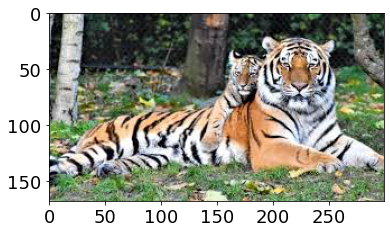

[[[131 134 143]
  [158 161 170]
  [180 183 192]
  ...
  [ 33  57  35]
  [ 38  57  38]
  [ 46  60  45]]

 [[109 112 121]
  [157 160 169]
  [160 163 172]
  ...
  [ 24  48  26]
  [ 29  48  29]
  [ 34  51  35]]

 [[145 148 157]
  [193 196 205]
  [182 185 194]
  ...
  [ 13  37  15]
  [ 18  37  18]
  [ 22  39  23]]

 ...

 [[ 90  96  86]
  [ 83  89  77]
  [ 82  91  74]
  ...
  [128 141 121]
  [126 139 119]
  [104 117  97]]

 [[109 120 106]
  [ 90 103  86]
  [110 125 104]
  ...
  [101 112  96]
  [127 140 123]
  [125 138 121]]

 [[149 166 148]
  [182 199 180]
  [162 182 157]
  ...
  [131 142 128]
  [136 146 135]
  [124 134 123]]]


In [20]:
#we will use the matplotlib library for reading an image
from matplotlib import image
from matplotlib import pyplot as plt
# read in image
image = image.imread('../images/tigers.jpg')
#show the image
plt.imshow(image)
plt.show()
#how the image is represented in the program
print (image)

## Choropleths
<ul><li>Thematic maps in which <b>values of a variable</b> are represented as a <b>color gradient</b></li>
<li><b>Spatial Counterparts</b> of the <b>histogram</b></li>
<li> <b>Values</b> are <b>classified</b> into <b>specific colors</b></li>
<li> <b>Information loss</b> is <b>high</b></li>
</ul>

Let's practice Choropleth mapping !!!!!!

In [21]:
#use geopandas for loading spatial data
import geopandas as gpd
#lets load the ohio census tract data
oh_tracts=gpd.read_file(r'../class_data/Ohio_svi_2018/SVI2018_OHIO_tract.shp')
#let's see the columns for oh_tracts
print (oh_tracts.columns.values.tolist())

['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_HU', 'M_HU', 'E_HH', 'M_HH', 'E_POV', 'M_POV', 'E_UNEMP', 'M_UNEMP', 'E_PCI', 'M_PCI', 'E_NOHSDP', 'M_NOHSDP', 'E_AGE65', 'M_AGE65', 'E_AGE17', 'M_AGE17', 'E_DISABL', 'M_DISABL', 'E_SNGPNT', 'M_SNGPNT', 'E_MINRTY', 'M_MINRTY', 'E_LIMENG', 'M_LIMENG', 'E_MUNIT', 'M_MUNIT', 'E_MOBILE', 'M_MOBILE', 'E_CROWD', 'M_CROWD', 'E_NOVEH', 'M_NOVEH', 'E_GROUPQ', 'M_GROUPQ', 'EP_POV', 'MP_POV', 'EP_UNEMP', 'MP_UNEMP', 'EP_PCI', 'MP_PCI', 'EP_NOHSDP', 'MP_NOHSDP', 'EP_AGE65', 'MP_AGE65', 'EP_AGE17', 'MP_AGE17', 'EP_DISABL', 'MP_DISABL', 'EP_SNGPNT', 'MP_SNGPNT', 'EP_MINRTY', 'MP_MINRTY', 'EP_LIMENG', 'MP_LIMENG', 'EP_MUNIT', 'MP_MUNIT', 'EP_MOBILE', 'MP_MOBILE', 'EP_CROWD', 'MP_CROWD', 'EP_NOVEH', 'MP_NOVEH', 'EP_GROUPQ', 'MP_GROUPQ', 'EPL_POV', 'EPL_UNEMP', 'EPL_PCI', 'EPL_NOHSDP', 'SPL_THEME1', 'RPL_THEME1', 'EPL_AGE65', 'EPL_AGE17', 'EPL_DISABL', 'EPL_SNGPNT', 'SPL_THEME2', 'RPL_THEME2', 'EP

<AxesSubplot:>

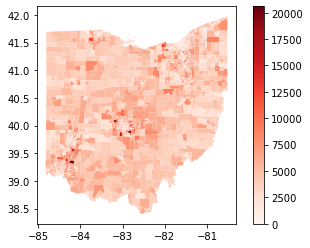

In [3]:
#lets's create a basic choropleth map for the variable E_TOTPOP (Total population)
#its very straightforward to create a choropleth map. We will use Reds color map 
oh_tracts.plot('E_TOTPOP',cmap='Reds',legend=True)

<AxesSubplot:>

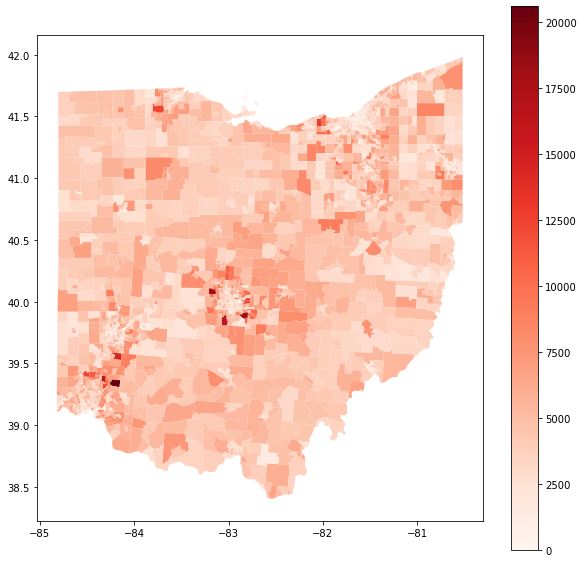

In [4]:
# to get more flexibility we can use matplotlib for plotting
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
oh_tracts.plot('E_TOTPOP',cmap='Reds',ax=ax,legend=True)

Let's do an attribute based join for this we are going to use county data

In [6]:
oh_counties=gpd.read_file(r'../class_data/OH_County/REFER_COUNTY.shp')
#let's see the columns for oh_counties
print (oh_counties.columns.values.tolist())

['COUNTY_CD', 'COUNTY', 'COUNTY_SEA', 'ODOT_DISTR', 'FIPS_COUNT', 'POP_2010', 'POP_2000', 'POP_1990', 'STATE_PLAN', 'ELEVATION_', 'ELEVATION1', 'LAT_NORTH_', 'LAT_SOUTH_', 'LONG_EAST_', 'LONG_WEST_', 'AREA_SQMI', 'AREA_ID', 'created_us', 'created_da', 'last_edite', 'last_edi_1', 'SHAPE_STAr', 'SHAPE_STLe', 'geometry']


In [7]:
#lets load up the cancer data for OHIO(https://publicapps.odh.ohio.gov/EDW/DataBrowser/Browse/StateLayoutLockdownCancers)
#We use pandas to load up the data
import pandas as pd
cancer_data=pd.read_csv(r'../class_data/ohio_cancer.csv')
#let's see the columns
print (cancer_data.columns)

Index(['county', 'Bladder', 'Brain and Other CNS', 'Breast', 'Cervix',
       'Colon & Rectum', 'Esophagus', 'Hodgkins Lymphoma',
       'Kidney & Renal Pelvis', 'Larynx', 'Leukemia',
       'Liver & Intrahepatic Bile Duct', 'Lung and Bronchus',
       'Melanoma of Skin', 'Multiple Myeloma', 'Non-Hodgkins Lymphoma',
       'Oral Cavity & Pharynx', 'Other Sites/Types', 'Ovary', 'Pancreas',
       'Prostate', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Total'],
      dtype='object')


In [8]:
#We will create a choropleth map for the variable 'Breast' (breast cancer)
#Select the county column and the required variable. We will use the county column for join
county_bcancer=cancer_data[['county','Breast']]
county_bcancer

,county,Breast
0,Adams,57.6
1,Allen,64.1
2,Ashland,60.5
3,Ashtabula,61.9
4,Athens,55.8
...,...,...
83,Washington,68.2
84,Wayne,64.6
85,Williams,66.8
86,Wood,64.8


In [9]:
#now we need to join this dataset to the oh_counties dataset. We know that the common columns are
# 'county' in cancer data and 'COUNTY' in oh_counties
oh_counties_with_b_cancer=oh_counties.merge(county_bcancer,left_on='COUNTY',right_on='county')
oh_counties_with_b_cancer

,COUNTY_CD,COUNTY,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry,county,Breast


In [10]:
#why are you getting no data....because COUNTY values in oh_counties has all caps while its not the case for county_bcancer
#print first five values of oh_counties COUNTY and check
print (oh_counties.COUNTY.head())
#print first five values of county_bcancer county and check
print (county_bcancer.county.head())

0        LUCAS
1    COSHOCTON
2        BROWN
3     HIGHLAND
4       HOLMES
Name: COUNTY, dtype: object
0        Adams
1        Allen
2      Ashland
3    Ashtabula
4       Athens
Name: county, dtype: object


In [11]:
#so what could be done. We can convert both this fields to small letters and then give a try
oh_counties['county_lower']=oh_counties['COUNTY'].str.lower()
county_bcancer['county_lower']=county_bcancer['county'].str.lower()

/tmp/ipykernel_3291/3535374033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_bcancer['county_lower']=county_bcancer['county'].str.lower()


In [12]:
#now check both 
print (oh_counties.county_lower.head())
print (county_bcancer.county_lower.head())

0        lucas
1    coshocton
2        brown
3     highland
4       holmes
Name: county_lower, dtype: object
0        adams
1        allen
2      ashland
3    ashtabula
4       athens
Name: county_lower, dtype: object


In [13]:
#Now use the county_lower column to merge
oh_counties_with_b_cancer=oh_counties.merge(county_bcancer,left_on='county_lower',right_on='county_lower')
oh_counties_with_b_cancer

,COUNTY_CD,COUNTY,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry,county_lower,county,Breast
0,LUC,LUCAS,TOLEDO,2,39095,441815,455054,462361,N,715,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,1.610474e+09,270990.965727,"POLYGON ((-9290122.672 5120504.038, -9290126.3...",lucas,Lucas,66.5
1,COS,COSHOCTON,COSHOCTON,5,39031,36901,36655,35427,N,1300,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,2.529116e+09,213121.169057,"POLYGON ((-9144444.121 4932259.231, -9142650.4...",coshocton,Coshocton,61.2
2,BRO,BROWN,GEORGETOWN,9,39015,44846,42285,34966,S,1090,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,2.114031e+09,243300.067767,"POLYGON ((-9338953.591 4757373.445, -9337293.0...",brown,Brown,53.9
3,HIG,HIGHLAND,HILLSBORO,9,39071,43589,40875,35728,S,1340,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,2.407747e+09,213157.741018,"POLYGON ((-9281908.238 4763814.016, -9281886.2...",highland,Highland,59.1
4,HOL,HOLMES,MILLERSBURG,11,39075,42366,38943,32849,N,1380,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,1.905310e+09,193044.918259,"POLYGON ((-9089125.135 4963457.660, -9089119.5...",holmes,Holmes,44.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,LOG,LOGAN,BELLEFONTAINE,7,39091,45858,46005,42310,N,1549,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,2.086155e+09,190284.032265,"POLYGON ((-9337476.741 4944528.262, -9337463.3...",logan,Logan,57.3
84,MED,MEDINA,MEDINA,3,39103,172332,151095,122354,N,1320,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,1.932137e+09,192276.626187,"POLYGON ((-9093238.201 5041959.343, -9093249.9...",medina,Medina,70.3
85,NOB,NOBLE,CALDWELL,10,39121,14645,14058,11336,S,1340,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,1.776302e+09,232976.730267,"POLYGON ((-9055592.068 4859200.890, -9052584.5...",noble,Noble,42.0
86,PIK,PIKE,WAVERLY,9,39131,28709,27695,24249,S,1320,...,TIMS@P31_AG,2021-07-27,TIMS@P31_AG,2021-07-27,1.910697e+09,192107.489157,"POLYGON ((-9216977.711 4730163.159, -9217256.9...",pike,Pike,69.4


<AxesSubplot:>

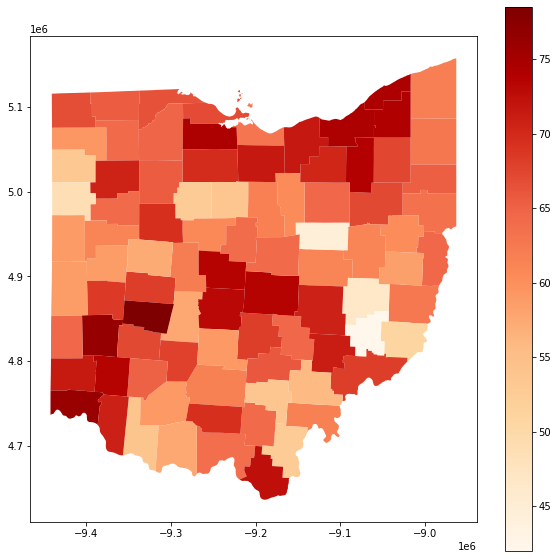

In [14]:
#Now we can use the variable 'Breast' for generating the choropleth map
fig,ax=plt.subplots(figsize=(10,10))
oh_counties_with_b_cancer.plot('Breast',cmap='OrRd',ax=ax,legend=True)

## Issues we should be aware of while using Choropleth mapping 

Whenever we see a pattern we should be aware of the fact that the pattern could be a by product of an underlying <b>spatial variation</b>.

### Reasons for spatial variation
<b>*First-order*</b> spatial variation occurs when observations across a study region vary from place to place due to changes in the underlying properties of the local "environment". For eg. the incidence of crime might vary spatially simply because of variations in the population density, such that rates increase near the center of large city.

<b>*Second-order*</b> variation is due to local interaction effects between observations. For eg. existence of crime in an area making it more likely that there will be crimes surrounding that area, perhaphs in the shape of local hot-spots in the vicinity of bars and clubs, or near local street drug markets.

### Issues due to Spatial Variation
#### Modifieable Area Unit Problem (MAUP)
Many data are aggregates of data compiled at a more detailed level. For eg national census data is collected at household levels and aggregated to city,districts, counties, and states. The issue is that aggregation units used are arbitary with respect to the phenomena under investigation. 
If the *spatial units* in a particular study were specified differently, we might observe very different patterns and relationships. Let's see a hypothetical example for MAUP

y = 0.7543471789553123x + 10.374967530066682
y = 0.6798215971433648x + 13.589918323232057
y = 0.9657093442868309x + 1.2570385645153213


Text(0.5, 1.0, 'Best Fit')

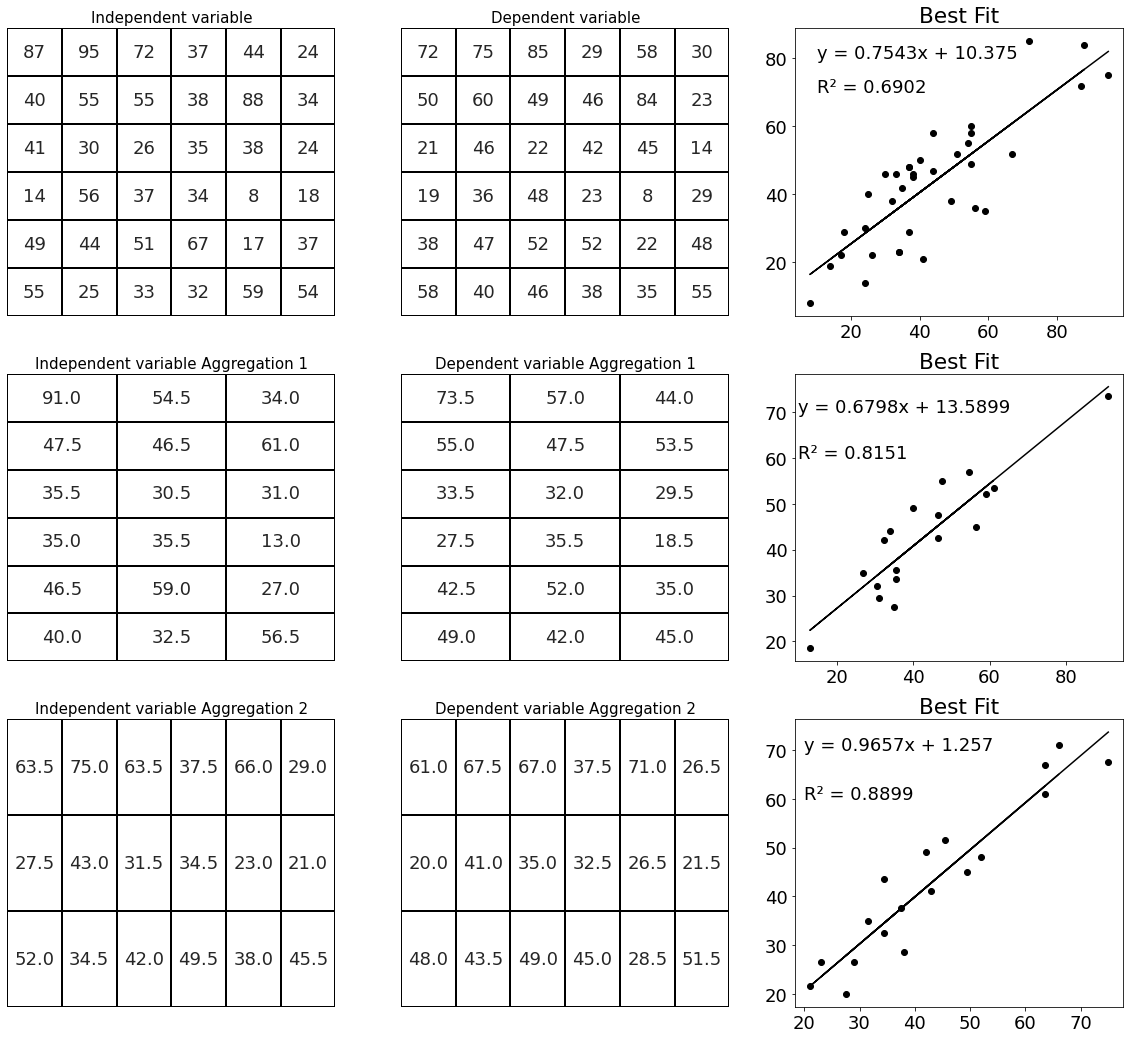

In [32]:
## numpy for creating matrix
import numpy as np
#seaborn for plotting matrix
import seaborn as sns
#colormap for creating a white background
from matplotlib.colors import ListedColormap
#matrplotlib for plots
import matplotlib.pyplot as plt
plt.rc('font', size=18)
#independent varable (6X6 matrix)
ind_variable=np.asarray([87,95,72,37,44,24,40,55,55,38,88,34,41,30,26,35,38,24,14,56,37,34,8,18,49,44,51,67,17,37,55,25,33,32,59,54]).reshape(6,6)
#dependent varable (6X6 matrix)
dep_variable=np.asarray([72,75,85,29,58,30,50,60,49,46,84,23,21,46,22,42,45,14,19,36,48,23,8,29,38,47,52,52,22,48,58,40,46,38,35,55]).reshape(6,6)
fig,ax = plt.subplots(nrows=3, ncols=3,figsize=(20,18))
ax[0,0].set_title('Independent variable',fontsize=15)
ax[0,1].set_title('Dependent variable',fontsize=15)
sns.heatmap(ind_variable, ax=ax[0,0],annot=True, fmt="d",cbar=False,xticklabels=False,yticklabels=False,linewidths=2,linecolor='black',cmap=ListedColormap(['white']))
sns.heatmap(dep_variable, ax=ax[0,1],annot=True, fmt="d",cbar=False,xticklabels=False,yticklabels=False,linewidths=2,linecolor='black',cmap=ListedColormap(['white']))
#Now lets get the best fit curve. We will use numpy polyfit (linear n=1)
m, c = np.polyfit(ind_variable.flatten(), dep_variable.flatten(), 1)
#let's print the equation which is of the form y=mx+c
print (f"y = {m}x + {c}")
#now lets gets the R^2 value
correlation_matrix = np.corrcoef(ind_variable.flatten(), dep_variable.flatten())
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
ax[0,2].plot(ind_variable, dep_variable, 'ko')
ax[0,2].plot(ind_variable, m*ind_variable + c,'k')
ax[0,2].text(10, 80, f'y = {round(m,4)}x + {round(c,4)}',fontsize=18)
ax[0,2].text(10, 70, f'R\N{SUPERSCRIPT TWO} = {round(r_squared,4)}',fontsize=18)
ax[0,2].set_title('Best Fit')

#Now lets aggregate this using column aggregation(2 columns)
ind_variable_agg_1=np.mean(ind_variable.reshape(6,3,2),axis=2)
dep_variable_agg_1=np.mean(dep_variable.reshape(6,3,2),axis=2)
m_agg_1, c_agg_1 = np.polyfit(ind_variable_agg_1.flatten(), dep_variable_agg_1.flatten(), 1)
print (f"y = {m_agg_1}x + {c_agg_1}")
correlation_matrix_agg_1 = np.corrcoef(ind_variable_agg_1.flatten(), dep_variable_agg_1.flatten())
correlation_xy_agg_1 = correlation_matrix_agg_1[0,1]
r_squared_agg_1 = correlation_xy_agg_1**2
sns.heatmap(ind_variable_agg_1, ax=ax[1,0],annot=True, fmt=".1f",cbar=False,xticklabels=False,yticklabels=False,linewidths=2,linecolor='black',cmap=ListedColormap(['white']))
sns.heatmap(dep_variable_agg_1, ax=ax[1,1],annot=True, fmt=".1f",cbar=False,xticklabels=False,yticklabels=False,linewidths=2,linecolor='black',cmap=ListedColormap(['white']))
ax[1,0].set_title('Independent variable Aggregation 1',fontsize=15)
ax[1,1].set_title('Dependent variable Aggregation 1',fontsize=15)
ax[1,2].plot(ind_variable_agg_1, dep_variable_agg_1, 'ko')
ax[1,2].plot(ind_variable_agg_1, m_agg_1*ind_variable_agg_1 + c_agg_1,'k')
ax[1,2].text(10, 70, f'y = {round(m_agg_1,4)}x + {round(c_agg_1,4)}',fontsize=18)
ax[1,2].text(10, 60, f'R\N{SUPERSCRIPT TWO} = {round(r_squared_agg_1,4)}',fontsize=18)
ax[1,2].set_title('Best Fit')


#Now lets aggregate this using row aggregation(2 rows)
ind_variable_agg_2=np.mean(ind_variable.reshape(3,2,6),axis=1)
dep_variable_agg_2=np.mean(dep_variable.reshape(3,2,6),axis=1)
m_agg_2, c_agg_2 = np.polyfit(ind_variable_agg_2.flatten(), dep_variable_agg_2.flatten(), 1)
print (f"y = {m_agg_2}x + {c_agg_2}")
correlation_matrix_agg_2 = np.corrcoef(ind_variable_agg_2.flatten(), dep_variable_agg_2.flatten())
correlation_xy_agg_2 = correlation_matrix_agg_2[0,1]
r_squared_agg_2 = correlation_xy_agg_2**2
sns.heatmap(ind_variable_agg_2, ax=ax[2,0],annot=True, fmt=".1f",cbar=False,xticklabels=False,yticklabels=False,linewidths=2,linecolor='black',cmap=ListedColormap(['white']))
sns.heatmap(dep_variable_agg_2, ax=ax[2,1],annot=True, fmt=".1f",cbar=False,xticklabels=False,yticklabels=False,linewidths=2,linecolor='black',cmap=ListedColormap(['white']))
ax[2,0].set_title('Independent variable Aggregation 2',fontsize=15)
ax[2,1].set_title('Dependent variable Aggregation 2',fontsize=15)
ax[2,2].plot(ind_variable_agg_2, dep_variable_agg_2, 'ko')
ax[2,2].plot(ind_variable_agg_2, m_agg_2*ind_variable_agg_2 + c_agg_2,'k')
ax[2,2].text(20, 70, f'y = {round(m_agg_2,4)}x + {round(c_agg_2,4)}',fontsize=18)
ax[2,2].text(20, 60, f'R\N{SUPERSCRIPT TWO} = {round(r_squared_agg_2,4)}',fontsize=18)
ax[2,2].set_title('Best Fit')
#fig.savefig('../images/MAUP_agg.png',dpi=300)

![Package](../images/MAUP_agg.png)

From the above experiment you could easily see that as the level aggregation increases the R<sup>2</sup> value correspondingly increases showing an improvement in correlation. This clearly indicates that level of aggregation has a greater impact on spatial statistics and should be dealt with caution.

Let's see another example of MAUP. This time we will check the effects of Zoning



![Package](../images/MaupZoning.png)

You can clearly see that just be changing the way we spatially tesselate the data, different outcomes can be possible. 

Let's see another real world example of MAUP with zoning. Here we will be using covid data (of course synthetic!!!!)

<AxesSubplot:>

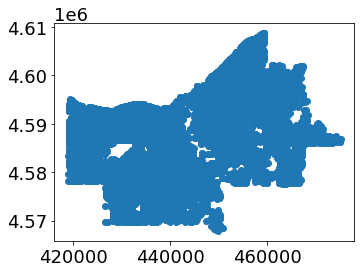

In [34]:
import geopandas as gpd
#Load the covid data for Cuyahoga county (has 50K records)
covid=gpd.read_file(r'../class_data/covid_dataset/cuyahoga_covid_dataset_sample.shp')
covid.plot()

In [35]:
#load the zip code data for Cuyahoga county
zip_cuy=gpd.read_file(r'../class_data/ZIP_Codes_WGS84/ZIP_Codes_WGS84.shp')
#as the projections are different for covid and zip_cuy reproject zip dataset
zip_cuy=zip_cuy.to_crs(covid.crs)

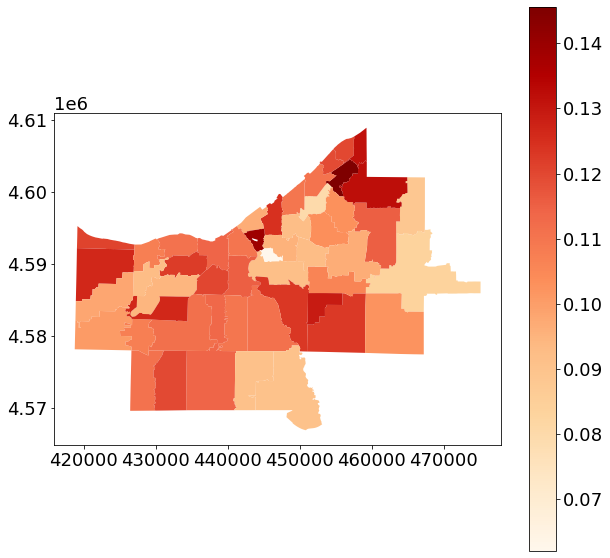

In [36]:
#Use spatial join to caclulate how many cases fall with in each zip code
#get the positives that fall with in each zip code. Positives have pos=1 and negatives hasve pos=0
positives=gpd.sjoin(zip_cuy,covid[covid.pos==1],how='left').groupby('ZIP_left',as_index=False).count()[['ZIP_left','OBJECTID']].rename(columns={'ZIP_left':'ZIP','OBJECTID':'pos_count'})
#get the total tests that fall with in each zip code
allcases=gpd.sjoin(zip_cuy,covid,how='left').groupby('ZIP_left',as_index=False).count()[['ZIP_left','OBJECTID']].rename(columns={'ZIP_left':'ZIP','OBJECTID':'all_count'})
#join positives and allcases based on common ZIP
combined=allcases.merge(positives,on='ZIP')
#remove zips that doesn't have atleast 10 tests
combined=combined[combined.all_count>=10]
#calculate postivity rate
combined['positivity']=combined['pos_count']/combined['all_count']
#join zip geometry and positivity based on common ZIP
zip_cuy=zip_cuy.merge(combined[['ZIP','positivity']],on='ZIP')
#plot positivity
fig, ax = plt.subplots(figsize=(10,10))
zip_cuy.plot(column='positivity',cmap='OrRd',ax=ax,legend=True)
#fig.savefig('../images/MAUP_zone_orig.png',dpi=300)

![Package](../images/MAUP_zone_orig.png)

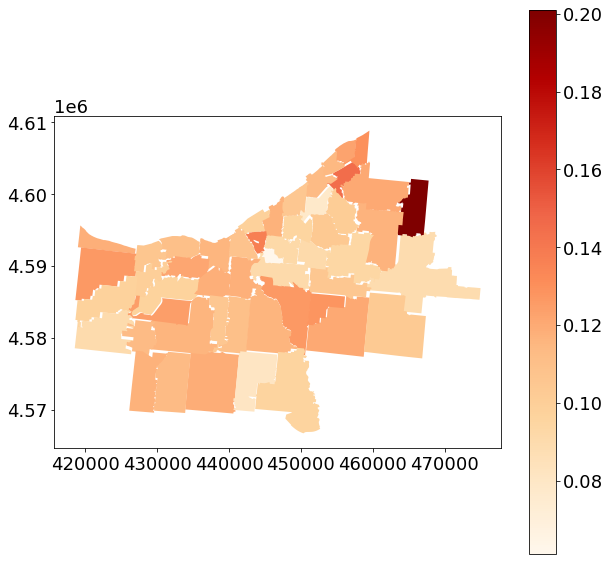

In [37]:
#make a copy
zip_cuy_r=zip_cuy.copy(deep=True).drop(columns=['positivity'])
#now rotate the geometry by -5 degree
zip_cuy_r.geometry=zip_cuy_r.geometry.rotate(-5)
#repeat the same caculation as previously done
positives_r=gpd.sjoin(zip_cuy_r,covid[covid.pos==1],how='left').groupby('ZIP_left',as_index=False).count()[['ZIP_left','OBJECTID']].rename(columns={'ZIP_left':'ZIP','OBJECTID':'pos_count'})
allcases_r=gpd.sjoin(zip_cuy_r,covid,how='left').groupby('ZIP_left',as_index=False).count()[['ZIP_left','OBJECTID']].rename(columns={'ZIP_left':'ZIP','OBJECTID':'all_count'})
combined_r=allcases_r.merge(positives_r,on='ZIP')
combined_r=combined_r[combined_r.all_count>=10]
combined_r['positivity']=combined_r['pos_count']/combined_r['all_count']
zip_cuy_r=zip_cuy_r.merge(combined_r[['ZIP','positivity']],on='ZIP')
fig, ax = plt.subplots(figsize=(10,10))
zip_cuy_r.plot(column='positivity',cmap='OrRd',ax=ax,legend=True);
#fig.savefig('../images/MAUP_zone_rotate.png',dpi=300)

![Package](../images/MAUP_zone_rotate.png)

As you could see even with a slight rotation of the geometries (-5<sup>o</sup>) the underlying variable has a substantial change which will impact the statistical results.

#### The <b>Zonal</b> effect of MAUP can also be done on purpose!!!! Can you guess!!! (Clue: Starts with a name)

#### Ecological Fallacy
The MAUP is closely related to a more statistical problem : the *ecological fallacy*. This arises when a statistical relatioship observed at one level of aggregation is assumed to hold because the same relationship holds when we look at a more detailed level. An eg. would be, we might observe a strong relationship between income and crime at the county level, with lower income areas being associated with higher crime rates. If we conclude that lower-income persons are more likely to commit crime, then we are falling into the problem of ecological fallacy. Unfortunately, this fallacy is more common in everyday and media discourse. The thread that's connecting MAUP and ecological fallacy is that *statistical relationships may change*.

#### <i>Of course he likes soccer (football) as its the most popular sport in the world.!!!!!!!!!</i>




   
   

#### Scale
The *geographical scale* at which we examine a phenomenon can affect the observations we make and must always be considered prior to spatial analysis. For eg. at continental level a city may be represented as a point, and at a regional level it might be represented as an area object. At a local scale the city might be represented as a collection of points, lines, areas, and network objects. The scale at which we work determines the representation we choose, which will have a greater implication on spatial analysis.



![Package](../images/scale.png)

#### Nonuniformity of Space and Edge Effects
*Space is not uniform*. This is particularly problematic for high resolution data. For eg. if we are only plotting crime locations gathered for a single police percinct,it will be very easy to see patterns. Patterns may appear particularly strong if crime locations are mapped simply as points without reference to the underlying Geography. There will be clusters simply as a result of where people live and work and apparent *gaps*.
    A particular type of non-uniformity problem encountered is due to *edge effects*. These arise where an artificial boundary is imposed on a study. Sites in the centre of study area can have observations in all direction while sites at the edges will not have any observations that are closer ye t outside the artificial study boundary.
    Let's look into an example for edge effect. 
    
    
   

![Package](../images/edgeeffect.png)
   
   If we are taking the polygon as the study area and discard the points that are outside the study area, then we would miss an important cluster around the factory in the southern most tip.